# MLR Cross Validation

In [47]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy as sp
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.stats.proportion as ssp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from statsmodels.stats.outliers_influence import variance_inflation_factor
import patsy
from math import sqrt
import os
os.chdir(r"C:\Users\willi\OneDrive\Documents\Woolf Institute Data Analytics\Module 3 Predictive Modelling\Live Class Data Sets")

Case Study:

Background:

A car insurance company collects range of information from their customers at the time of buying and claiming insurance. The company wishes to check if any of this information can be used to model and predict claim amount

Objective:

To model motor insurance claim amount based on vehicle related information collected at the time of registering and claiming insurance



In [17]:
# Import Data
motor = pd.read_csv("Motor_Claims.csv")
print("✅ Dataset Loaded Successfully")
print(motor.info())
print(motor.describe())

✅ Dataset Loaded Successfully
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   vehage    1000 non-null   int64  
 1   CC        1000 non-null   int64  
 2   Length    1000 non-null   int64  
 3   Weight    1000 non-null   int64  
 4   claimamt  1000 non-null   float64
dtypes: float64(1), int64(4)
memory usage: 39.2 KB
None
            vehage           CC       Length       Weight       claimamt
count  1000.000000  1000.000000  1000.000000  1000.000000    1000.000000
mean      3.266000  1267.561000  3732.103000   961.524000   59808.740628
std       2.377161   412.448365   332.988011   250.208609   22148.837109
min       0.000000   796.000000  3335.000000   665.000000   24000.000000
25%       1.000000   999.000000  3520.000000   854.000000   40800.000000
50%       3.000000  1086.000000  3565.000000   875.000000   59643.000000
75%       5.000000  1405.

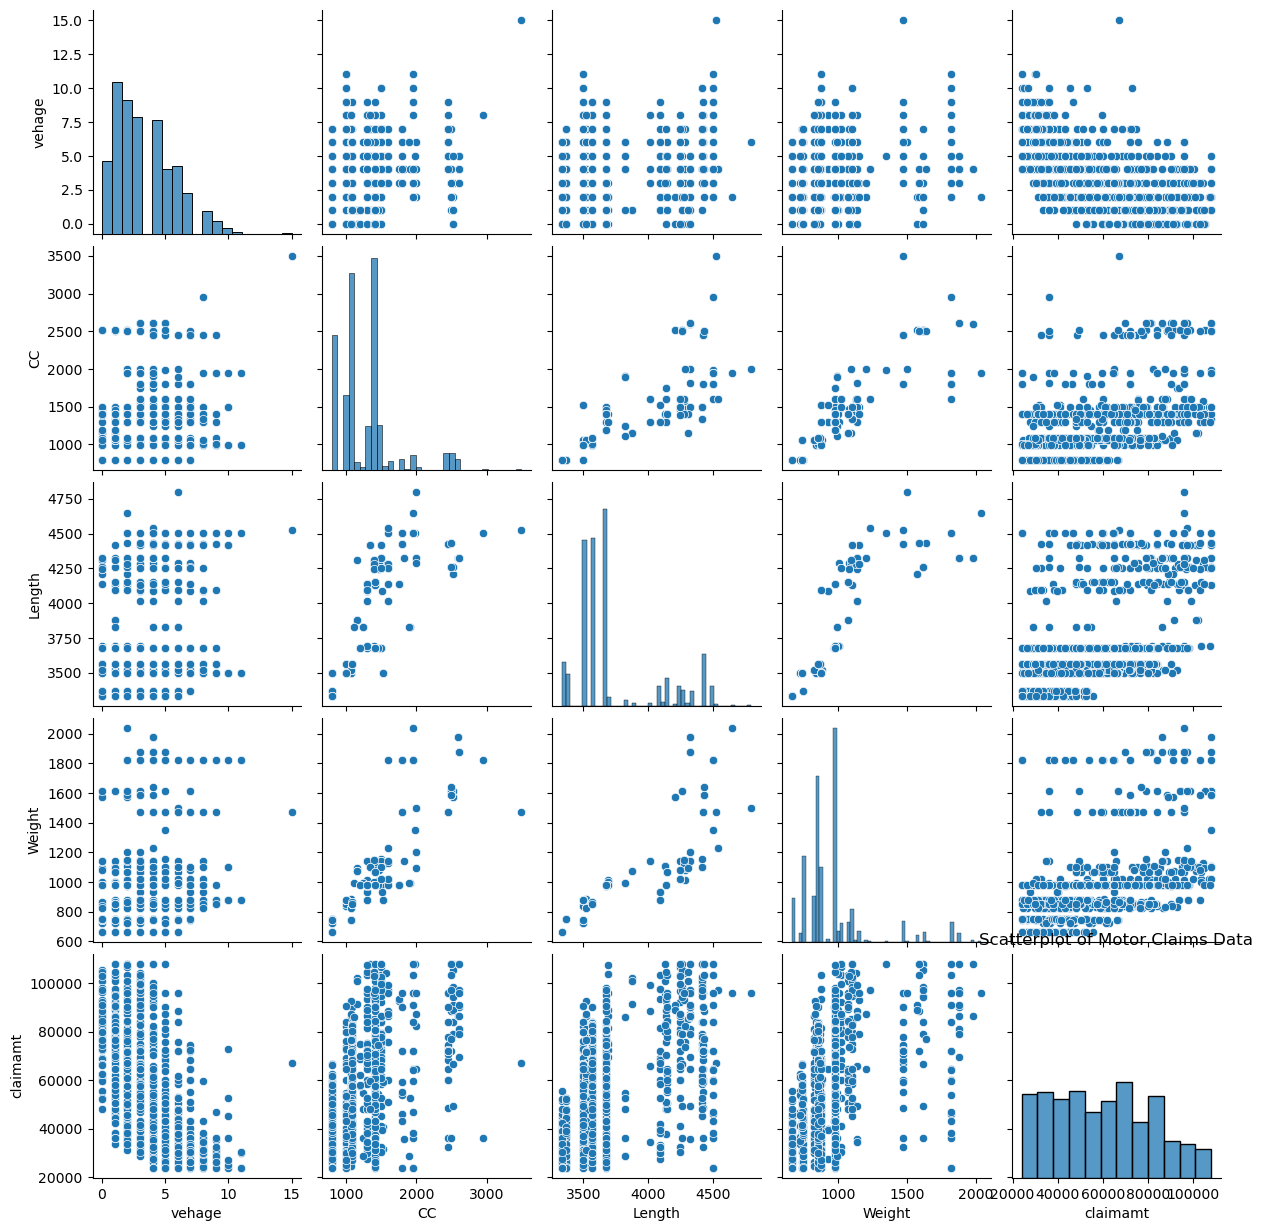

In [18]:
# Obtain Scatter Plot to visualise distribution of variables

sns.pairplot(motor);plt.title("Scatterplot of Motor Claims Data")
plt.show()

From the scatter plot you can see evidence of multicollinearity especially between CC vs weight, length vs weight and  length vs CC. Validation with VIF would be prudent.

# Step 2: Modelling using the ols fxn

In [19]:
motormodel = smf.ols("claimamt~Length+CC+vehage+Weight", data=motor).fit()
print(motormodel.summary())

                            OLS Regression Results                            
Dep. Variable:               claimamt   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     700.3
Date:                Sat, 12 Apr 2025   Prob (F-statistic):          1.83e-287
Time:                        06:58:33   Log-Likelihood:                -10754.
No. Observations:                1000   AIC:                         2.152e+04
Df Residuals:                     995   BIC:                         2.154e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.477e+04   5569.375     -9.833      0.0

In [20]:
# Obtain VIF to check for multicollinearity
# Break left and right hand side of the equation

y, x = patsy.dmatrices("claimamt~Length+CC+vehage+Weight", data=motor, return_type='dataframe')
print(x.columns)

# Calculating VIF
vif = pd.Series([variance_inflation_factor(x.values, i) for i in range(x.shape[1])], index=x.columns)
print(vif)

Index(['Intercept', 'Length', 'CC', 'vehage', 'Weight'], dtype='object')
Intercept    240.261728
Length         3.396171
CC             5.881428
vehage         1.038357
Weight         6.552811
dtype: float64


Output: CC and Weight have VIFs > 5,  we proceed to creatwe a new model and drop weight which had the highest VIF

In [21]:
# New Model

motormodel1 = smf.ols('claimamt~Length+CC+vehage', data=motor).fit()
motormodel1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               claimamt   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     910.3
Date:                Sat, 12 Apr 2025   Prob (F-statistic):          8.79e-285
Time:                        06:59:38   Log-Likelihood:                -10764.
No. Observations:                1000   AIC:                         2.154e+04
Df Residuals:                     996   BIC:                         2.156e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -4.92e+04   5475.151     -8.985      0.000   -5.99e+04   -3.85e+04
Length        32.0652      1.852     17.312      0.000      28.431      35.700
CC             8.6886      1.481      5.867      0.000       5.783      11.595
vehage     -6638.0765    155.525    -42.682      0.000   -6943.270   -6332.883
==============================================================================
Omnibus:                       10.930   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               15.892
Skew:                          -0.072   Prob(JB):                     0.000354
Kurtosis:                       3.600   Cond. No.                     5.99e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.99e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
# Calculate the VIF of the new model
y, x = patsy.dmatrices("claimamt~Length+CC+vehage", data=motor, return_type='dataframe')
print(x.columns)    


Index(['Intercept', 'Length', 'CC', 'vehage'], dtype='object')


In [29]:
vif = pd.Series([variance_inflation_factor(x.values, i) for i in range(x.shape[1])], index=x.columns)
vif

Intercept    227.959103
Length         2.889718
CC             2.833931
vehage         1.038355
dtype: float64

Output: All VIFs are <5

# Root Mean Squared Error (RMSE)

In [32]:
# RMSE of the model

motor = motor.assign(res=pd.Series(motormodel1.resid))

RMSE = sqrt((motor['res']**2).mean())
print("RMSE: ", RMSE)

RMSE:  11444.512861029949


# Hold-Out Validation

In [44]:
motor_model=smf.ols('claimamt~vehage+CC+Length', data = motor_train).fit()


In [45]:
# Create Datasets for validation
motor_train, motor_test = train_test_split(motor, test_size=0.2, random_state=0)

In [46]:
print("Shape:",motor_train.shape)  

Shape: (800, 6)


In [39]:
print("Shape:", motor_test.shape)

Shape: (200, 6)


RMSE for Training Data

In [40]:
motor_model = smf.ols('claimamt~Length+CC+vehage', data=motor_train).fit()
motor_train = motor_train.assign(res=pd.Series(motor_model.resid))
motor_train.head()

,vehage,CC,Length,Weight,claimamt,res
687,4,1405,3675,980,60000.000,5359.685649
500,3,1527,3495,875,59279.904,2466.594810
332,3,2609,4325,1880,69599.952,-23190.652221
979,5,796,3335,665,24000.000,-7746.392441
817,1,1405,3675,980,74095.680,-273.987214


In [41]:
# RMSE

RMSEtrain = pd.Series(np.sqrt((motor_train['res']**2).mean()))
print("RMSE Train: ", RMSEtrain)

RMSE Train:  0    11569.182885
dtype: float64


RMSE for Test Data

In [42]:
motor_test=motor_test.assign(pred=pd.Series(motor_model.predict(motor_test)))
motor_test=motor_test.assign(res=pd.Series(motor_test.claimamt - motor_test.pred))



In [43]:
# RMSE
RMSEtest = pd.Series(np.sqrt((motor_test['res']**2).mean()))
print("RMSE Test: ", RMSEtest)

RMSE Test:  0    10949.775568
dtype: float64


# K-Fold Cross Validation

In [48]:
# Split into X and Y Variables

X=motor.drop(['claimamt'], axis = 1)
y=motor.claimamt


In [49]:
#Regression Model object is lm_reg
lm_reg = LinearRegression()

In [ ]:
# Perform K-Fold Cross Validation, K = 4